In [1]:
# importing ( pandas , numpy , os , glob ) to read data from patch's
import pandas as pd 
import numpy as np 
import os
import glob as gb
import matplotlib.pyplot as plt 
import cv2

In [2]:
# read data

## train data 
train_data = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/'

## test data 
test_data = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/'

##tests data 
pred_data = '/kaggle/input/skin-cancer/tests/'

In [3]:
# read and show train images

train_images = []
train_labels = []
class_ = {'benign': 0, 'malignant': 1}

# open train data folder  ( os , glob )
for folder in os.listdir(train_data) :
    data = gb.glob(pathname= str(train_data + folder + '/*.jpg'))
    print(f'{len(data)} in folder {folder}')
    # read train images 
    for data in data : 
        images = cv2.imread(data)
        images_array = cv2.resize(images,(100,100))
        train_images.append(list(images_array))
        train_labels.append(class_[folder])

5000 in folder benign
4605 in folder malignant


In [4]:
# read and show test images

test_images = []
test_labels = []
class_ = {'benign': 0, 'malignant': 1}

# open test data folder  ( os , glob )
for folder in os.listdir(test_data) :
    data = gb.glob(pathname= str(test_data + folder + '/*.jpg'))
    print(f'{len(data)} in folder {folder}')
    # read test images 
    for data in data : 
        images = cv2.imread(data)
        images_array = cv2.resize(images,(100,100))
        test_images.append(list(images_array))
        test_labels.append(class_[folder])

500 in folder benign
500 in folder malignant


In [5]:
def get_label(n) : 
    for x , y in class_.items() : 
        if n == y : 
            return x  

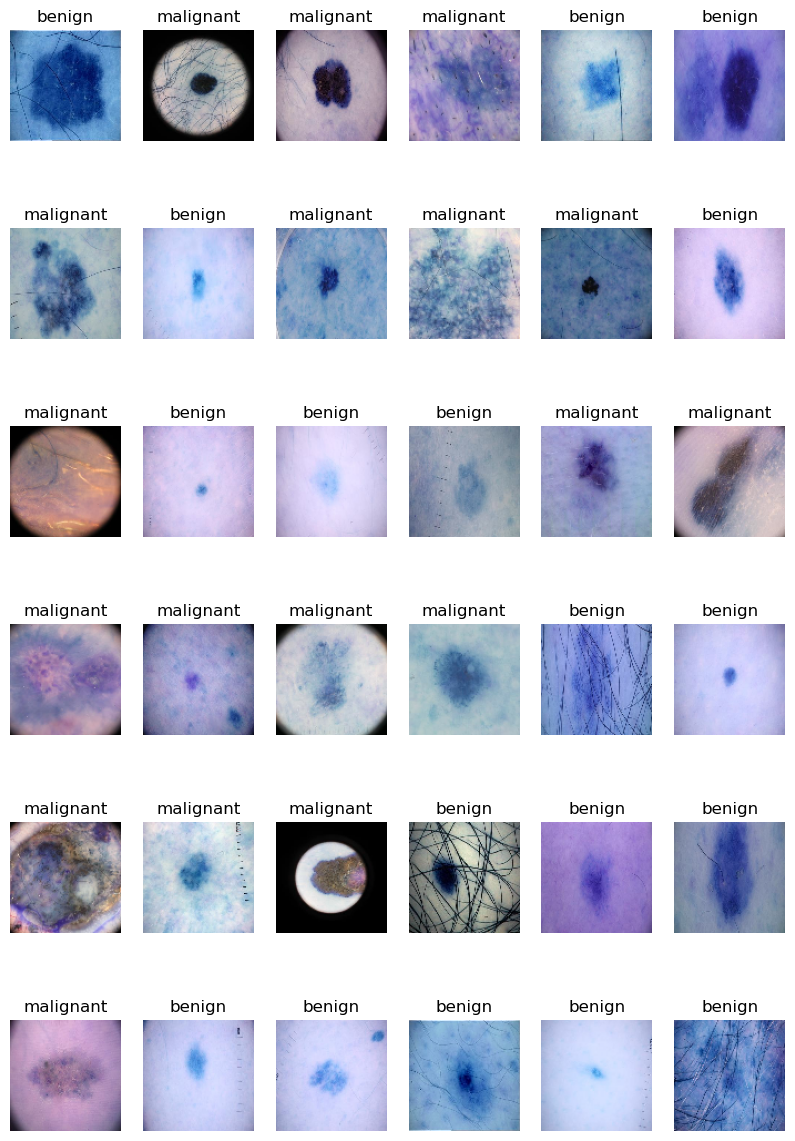

In [6]:
# show train images
plt.figure(figsize=(10,15))
for n , i in enumerate(list(np.random.randint(0,len(train_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])    
    plt.axis('off')
    plt.title(get_label(train_labels[i]))

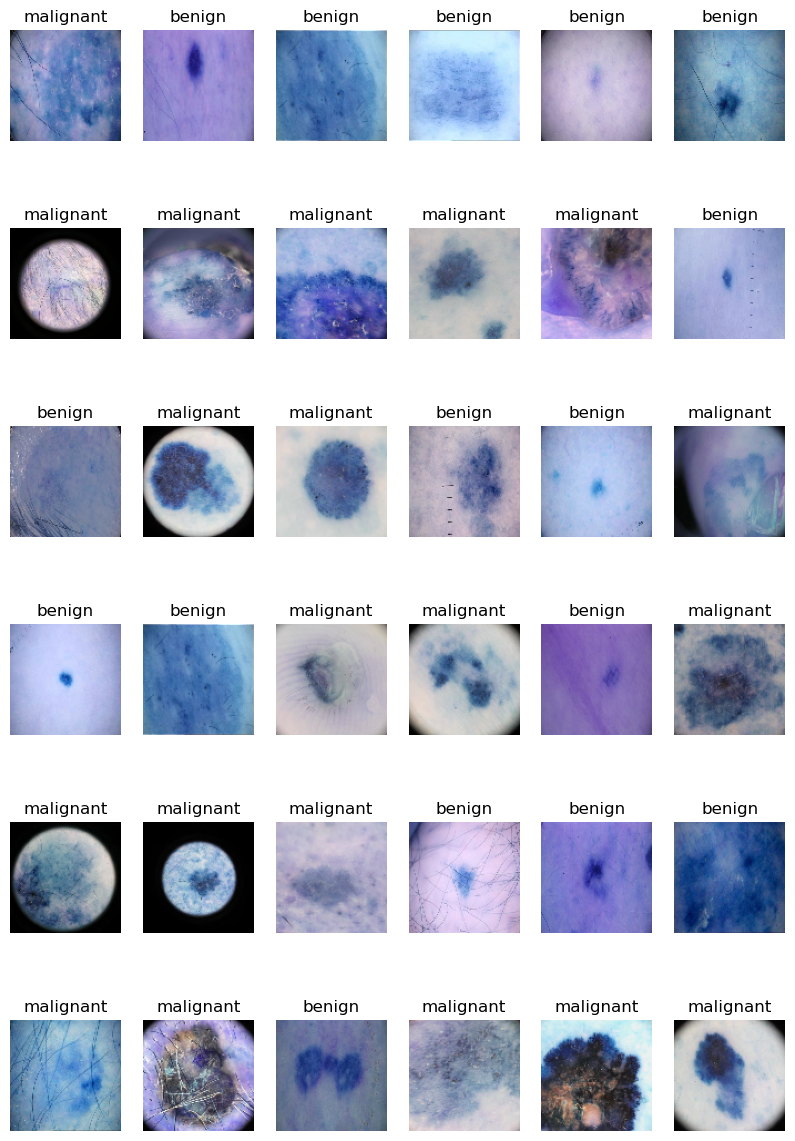

In [7]:
# show test images
plt.figure(figsize=(10,15))
for n , i in enumerate(list(np.random.randint(0,len(test_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(test_images[i])    
    plt.axis('off')
    plt.title(get_label(test_labels[i]))

In [8]:
# read pred data 

X_pred = [ ]
# open pred data folder  ( os , glob )
data = gb.glob(pathname= str(pred_data + '/*.JPG' or + '/*.jpg'))
print(f'{len(data)} ')
for data in data: 
    image = cv2.imread(data)
    image_array = cv2.resize(image , (100,100))
    X_pred.append(list(image_array)) 

272 


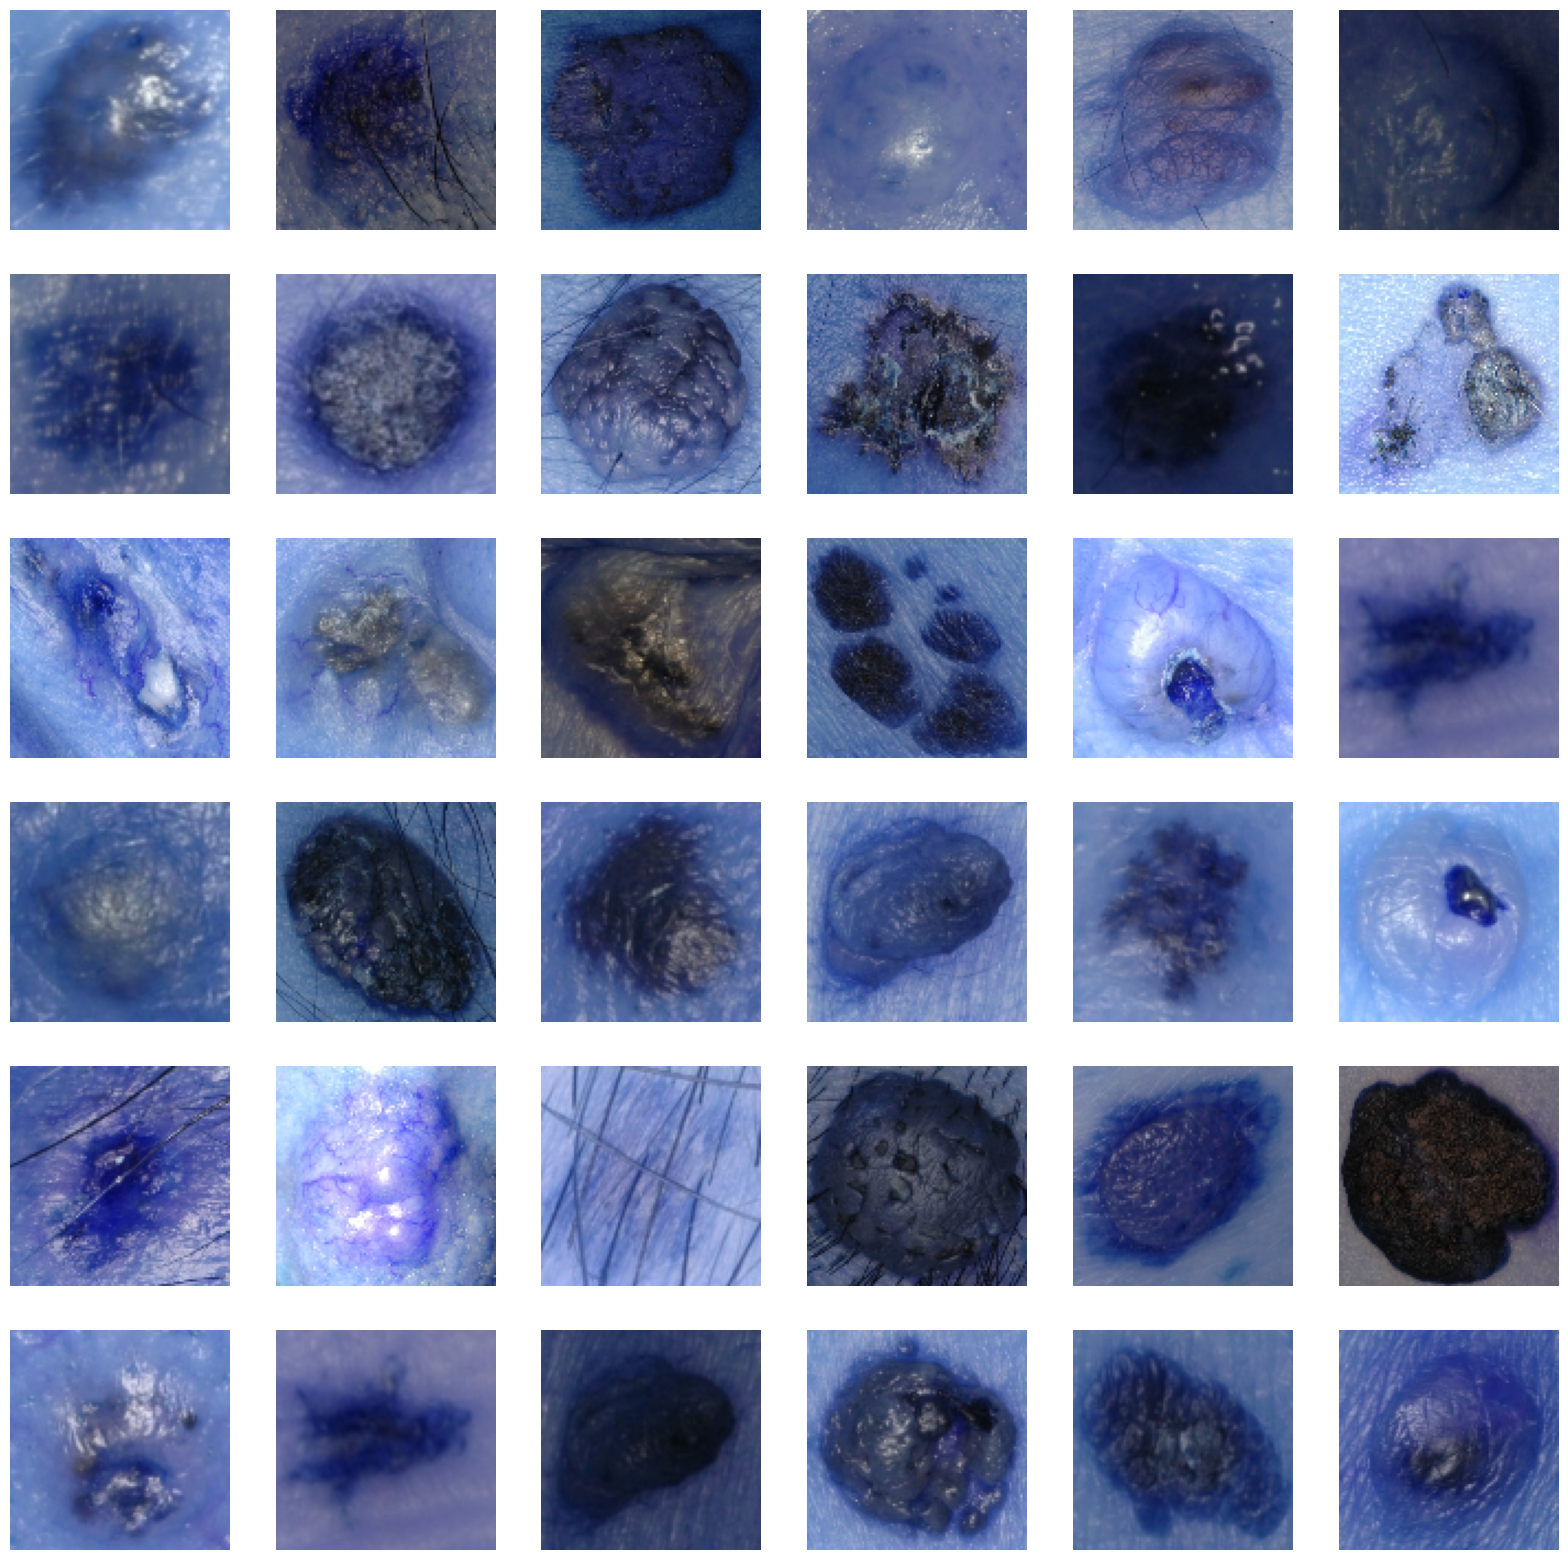

In [9]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [10]:
# convert data to array 
X_train = np.array(train_images)
X_test = np.array(test_images)
X_pred_array = np.array(X_pred)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [11]:
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (9605, 100, 100, 3)
X_test shape  is (1000, 100, 100, 3)
X_pred shape  is (272, 100, 100, 3)
y_train shape  is (9605,)
y_test shape  is (1000,)


In [12]:
# Building CNN model 
import tensorflow as tf 
import keras

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(512,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4), 
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'), 
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'), 
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(512,activation='relu') ,       
        keras.layers.Dense(256,activation='relu') ,    
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dense(64,activation='relu') ,
        keras.layers.Dropout(rate=0.2) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [14]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
print(KerasModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 256)       1179904   
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 256)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 128)       295040    
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 128)       147584    
                                                        

In [16]:
epochs = 20
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=128,verbose=1)

Epoch 1/20
76/76 [==============================] - 226s 2s/step - loss: 1.0679 - accuracy: 0.5925
Epoch 2/20
76/76 [==============================] - 168s 2s/step - loss: 0.5313 - accuracy: 0.7493
Epoch 3/20
76/76 [==============================] - 167s 2s/step - loss: 0.7715 - accuracy: 0.6361
Epoch 4/20
76/76 [==============================] - 167s 2s/step - loss: 2.9384 - accuracy: 0.5719
Epoch 5/20
76/76 [==============================] - 166s 2s/step - loss: 0.6751 - accuracy: 0.6250
Epoch 6/20
76/76 [==============================] - 167s 2s/step - loss: 0.5820 - accuracy: 0.6855
Epoch 7/20
76/76 [==============================] - 167s 2s/step - loss: 0.6750 - accuracy: 0.6548
Epoch 8/20
76/76 [==============================] - 167s 2s/step - loss: 0.6273 - accuracy: 0.6894
Epoch 9/20
76/76 [==============================] - 166s 2s/step - loss: 0.6121 - accuracy: 0.6814
Epoch 10/20
76/76 [==============================] - 166s 2s/step - loss: 0.4852 - accuracy: 0.7755
Epoch 11/

In [17]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

32/32 [==============================] - 10s 168ms/step - loss: 0.5195 - accuracy: 0.7120
Test Loss is 0.5194759368896484
Test Accuracy is 0.7120000123977661


In [18]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

32/32 [==============================] - 3s 91ms/step
Prediction Shape is (1000, 6)
